# Image Segmentation

## Point detection（点检测）

> ** tips **：
> * Point detection is one pixel.The isolated point that the human eye can perceive and recognize is usually a tiny region, it cannot be detected by this method.
> * It is not recommended to use cv2.filter2D for point detection, please use scipy.signal.

> * 点检测为一个像素。人眼能感知和识别的孤立点通常是一个很小的区域，用这种方法无法检测到。

> * 不建议使用cv2.filter2D用于点检测，请使用scipy.signal。


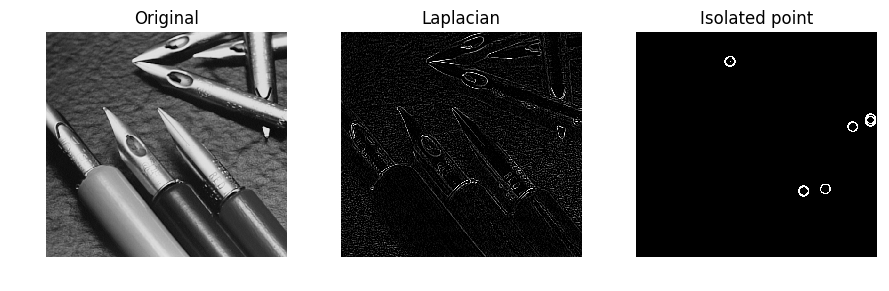

In [2]:
## 图像孤立点检测
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# img=cv2.imread("data/turbine_blade.jpg",0)
img=cv2.imread("data/pens.bmp",0)

# 此处使用scipy.signal实现卷积运算
kernelLaplace=np.array([[1,1,1],[1,-8,1],[1,1,1]])
imgLaplace=signal.convolve2d(img,kernelLaplace,boundary='symm',mode='same')

T=0.9*max(imgLaplace.max(),-imgLaplace.min())
imgPoint=np.zeros_like(img,np.uint8)
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        if np.abs(imgLaplace[i,j])>T:
            imgPoint[i,j]=255
            # 结果显示了一个点，几乎看不见
            # 在原图上用半径为 10的圆圈标记角点
            cv2.circle(imgPoint,(j,i),10,255,thickness = 2)

# display
plt.figure(figsize=(9, 7))
images=[img,imgLaplace,imgPoint]
titles=['Original','Laplacian','Isolated point']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray",vmin=0, vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


## Line detection

> ![](https://ai-studio-static-online.cdn.bcebos.com/ea7b0f041c49465fa16058cfb7066074b92343d3f7264d309d7bd461eff425e1)


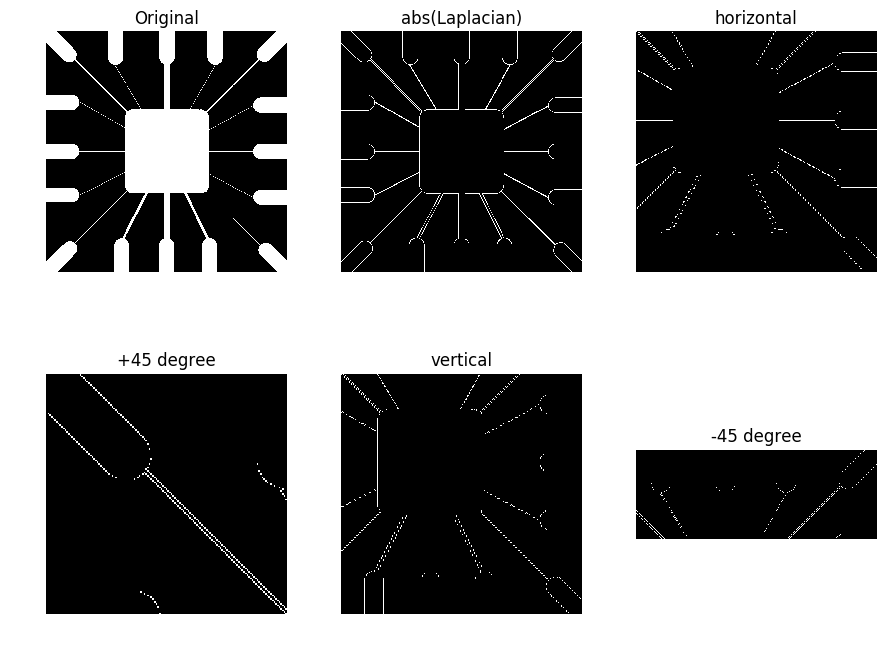

In [3]:
## 图像的线检测
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

img=cv2.imread("data/circuitmask.jpg",0)

# Laplace transform
kernelLaplace=np.array([[1,1,1],[1,-8,1],[1,1,1]])
imgLaplace=signal.convolve2d(img,kernelLaplace,boundary='symm',mode='same')

# 0 degree, horizontal
kernel1 = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])  
# +45 degree
kernel2 = np.array([[2, -1, -1], [-1, 2, -1], [-1, -1, 2]]) 
# 90 degree, vertical
kernel3 = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
# -45 degree  
kernel4 = np.array([[-1, -1, 2], [-1, 2, -1], [2, -1, -1]]) 

imgLine1 = signal.convolve2d(img, kernel1, boundary='symm', mode='same')  
imgLine2 = signal.convolve2d(img, kernel2, boundary='symm', mode='same')
imgLine3 = signal.convolve2d(img, kernel3, boundary='symm', mode='same')  
imgLine4 = signal.convolve2d(img, kernel4, boundary='symm', mode='same')

# display
plt.figure(figsize=(9, 7))
images=[img,np.maximum(imgLaplace, -imgLaplace),imgLine1[200:,200:],imgLine2[:286,:286],imgLine3[200:,200:],imgLine4[:286,200:]]
titles=['Original','abs(Laplacian)','horizontal','+45 degree','vertical','-45 degree']
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],"gray",vmin=0, vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

## Edge detection(边缘检测)
### edge type 


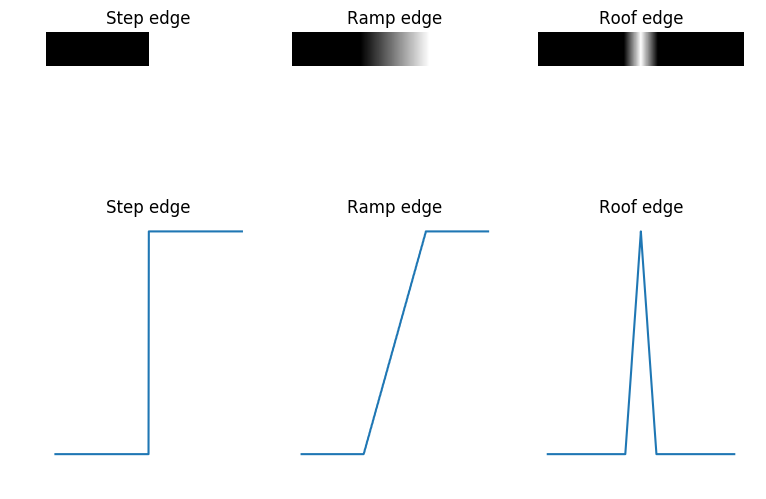

In [4]:
## 图像的边缘模型
h ,w = 100, 600
onesW = np.ones((h, 1), dtype=np.int)
x = range(w)

# 台阶模型 (step edge)
imgStep = np.zeros((h, w), np.uint8)
imgStep[:, 300:600] = 255

# 斜坡模型 (ramp edge)
imgRamp = np.zeros((h,w), np.uint8)
for i in range(200, 400):
    imgRamp[:, i] = 255 * (i-199) / 200
imgRamp[:, 400:] = 255

# 屋顶模型 (roof edge)
imgRoof = np.zeros((h,w), np.uint8)
for i in range(250, 300):
    imgRoof[:, i] = 255 * (i-249) / 50
for i in range(300, 350):
    imgRoof[:, i] = 255 - 255 * (i-299) / 50
imgRoof[:, 350:] = 0

# display
plt.figure(figsize=(9, 7))
images=[imgStep,imgRamp,imgRoof,imgStep[0,:],imgRamp[0,:],imgRoof[0,:]]
titles=['Step edge','Ramp edge','Roof edge']
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.axis("off")

for i in range(3):
    plt.subplot(2,3,i+4)
    plt.plot(x,images[i+3])
    plt.title(titles[i])
    plt.axis("off")



### edge detection operator边缘检测算子
#### Gradient operator梯度算子
> * First and second order derivative： Robert、Sobel、Prewitt、Laplacian ban be used in edge detection. 
> * Some improved operator: Marr-Hildreth 、Canny 。

一阶和二阶导数:Robert, Sobel, Prewitt, Laplacian ban用于边缘检测。

一些改进的operator:Marr-Hildreth, Canny。


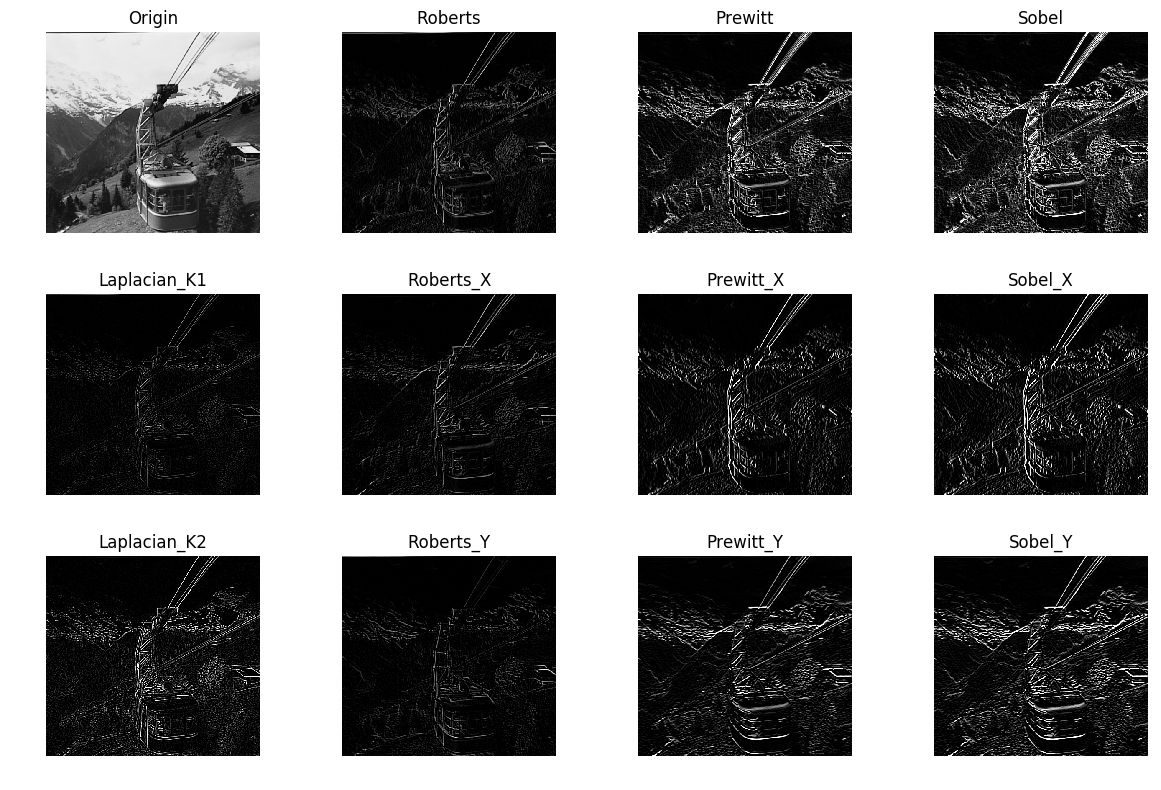

In [6]:
## 边缘检测的梯度算子
# img=cv2.imread("data/house.tif",0)
img=cv2.imread("data/cablecar.bmp",0)

# Roberts 边缘算子
kernel_Roberts_x = np.array([[1, 0], [0, -1]])
kernel_Roberts_y = np.array([[0, -1], [1, 0]])
# Prewitt 边缘算子
kernel_Prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_Prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
# Sobel 边缘算子
kernel_Sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_Sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
# Laplacian 边缘算子
kernel_Laplacian_K1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel_Laplacian_K2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

# 卷积运算
imgBlur = cv2.blur(img, (3,3)) 
imgLaplacian_K1 = cv2.filter2D(img, -1, kernel_Laplacian_K1)
imgLaplacian_K2 = cv2.filter2D(img, -1, kernel_Laplacian_K2)
imgRoberts_x = cv2.filter2D(img, -1, kernel_Roberts_x)
imgRoberts_y = cv2.filter2D(img, -1, kernel_Roberts_y)
imgRoberts = np.uint8(cv2.normalize(np.abs(imgRoberts_x) + np.abs(imgRoberts_y), None, 0, 255, cv2.NORM_MINMAX))
imgPrewitt_x = cv2.filter2D(img, -1, kernel_Prewitt_x)
imgPrewitt_y = cv2.filter2D(img, -1, kernel_Prewitt_y)
imgPrewitt = np.uint8(cv2.normalize(np.abs(imgPrewitt_x) + np.abs(imgPrewitt_y), None, 0, 255, cv2.NORM_MINMAX))
imgSobel_x = cv2.filter2D(img, -1, kernel_Sobel_x)
imgSobel_y = cv2.filter2D(img, -1, kernel_Sobel_y)
imgSobel = np.uint8(cv2.normalize(np.abs(imgSobel_x) +np.abs(imgSobel_y), None, 0, 255, cv2.NORM_MINMAX))

plt.figure(figsize=(12, 8))
plt.subplot(341), plt.title('Origin'), plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(345), plt.title('Laplacian_K1'), plt.imshow(imgLaplacian_K1, cmap='gray'), plt.axis('off')
plt.subplot(349), plt.title('Laplacian_K2'), plt.imshow(imgLaplacian_K2, cmap='gray'), plt.axis('off')
plt.subplot(342), plt.title('Roberts'), plt.imshow(imgRoberts, cmap='gray'), plt.axis('off')
plt.subplot(346), plt.title('Roberts_X'), plt.imshow(imgRoberts_x, cmap='gray'), plt.axis('off')
plt.subplot(3,4,10), plt.title('Roberts_Y'), plt.imshow(imgRoberts_y, cmap='gray'), plt.axis('off')
plt.subplot(343), plt.title('Prewitt'), plt.imshow(imgPrewitt, cmap='gray'), plt.axis('off')
plt.subplot(347), plt.title('Prewitt_X'), plt.imshow(imgPrewitt_x, cmap='gray'), plt.axis('off')
plt.subplot(3,4,11), plt.title('Prewitt_Y'), plt.imshow(imgPrewitt_y, cmap='gray'), plt.axis('off')
plt.subplot(344), plt.title('Sobel'), plt.imshow(imgSobel, cmap='gray'), plt.axis('off')
plt.subplot(348), plt.title('Sobel_X'), plt.imshow(imgSobel_x, cmap='gray'), plt.axis('off')
plt.subplot(3,4,12), plt.title('Sobel_Y'), plt.imshow(imgSobel_y, cmap='gray'), plt.axis('off')
plt.tight_layout()
plt.show()

#### smoothing filter to improve gradient operator(改进梯度算子的平滑滤波器)
> * By smoothing the original image and then performing gradient convolution, the main edges of the image can be obtained and unnecessary details can be removed.

通过对原始图像进行平滑处理，再进行梯度卷积，可以得到图像的主要边缘，去除不必要的细节。

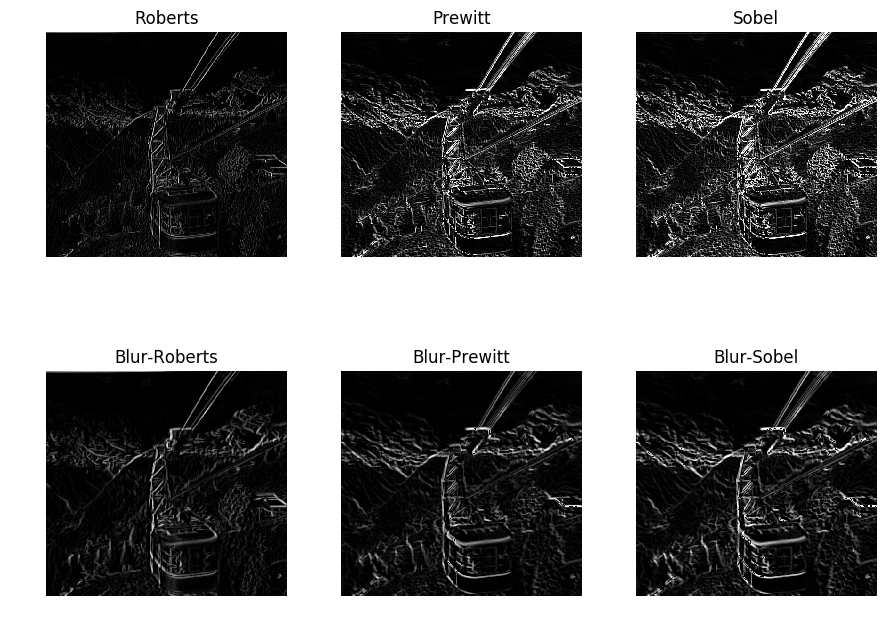

In [7]:
## 边缘检测算子：平滑操作的影响
# img = cv2.imread("data/house.tif", 0) 
img=cv2.imread("data/cablecar.bmp",0)

# 自定义卷积核
# Roberts 边缘算子
kernel_Roberts_x = np.array([[1, 0], [0, -1]])
kernel_Roberts_y = np.array([[0, -1], [1, 0]])
# Prewitt 边缘算子
kernel_Prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_Prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
# Sobel 边缘算子
kernel_Sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_Sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# 梯度算子直接进行卷积运算
imgRoberts_x = cv2.filter2D(img, -1, kernel_Roberts_x)
imgRoberts_y = cv2.filter2D(img, -1, kernel_Roberts_y)
imgRoberts = np.uint8(cv2.normalize(abs(imgRoberts_x) + abs(imgRoberts_y), None, 0, 255, cv2.NORM_MINMAX))
imgPrewitt_x = cv2.filter2D(img, -1, kernel_Prewitt_x)
imgPrewitt_y = cv2.filter2D(img, -1, kernel_Prewitt_y)
imgPrewitt = np.uint8(cv2.normalize(abs(imgPrewitt_x) + abs(imgPrewitt_y), None, 0, 255, cv2.NORM_MINMAX))
imgSobel_x = cv2.filter2D(img, -1, kernel_Sobel_x)
imgSobel_y = cv2.filter2D(img, -1, kernel_Sobel_y)
imgSobel = np.uint8(cv2.normalize(abs(imgSobel_x) + abs(imgSobel_y), None, 0, 255, cv2.NORM_MINMAX))

# 图像平滑后用梯度算子
imgBlur = cv2.blur(img, (5,5)) 
imgRoberts_x = cv2.filter2D(imgBlur, -1, kernel_Roberts_x)
imgRoberts_y = cv2.filter2D(imgBlur, -1, kernel_Roberts_y)
blurRoberts = np.uint8(cv2.normalize(abs(imgRoberts_x) + abs(imgRoberts_y), None, 0, 255, cv2.NORM_MINMAX))
imgPrewitt_x = cv2.filter2D(imgBlur, -1, kernel_Prewitt_x)
imgPrewitt_y = cv2.filter2D(imgBlur, -1, kernel_Prewitt_y)
blurPrewitt = np.uint8(cv2.normalize(abs(imgPrewitt_x) + abs(imgPrewitt_y), None, 0, 255, cv2.NORM_MINMAX))
imgSobel_x = cv2.filter2D(imgBlur, -1, kernel_Sobel_x)
imgSobel_y = cv2.filter2D(imgBlur, -1, kernel_Sobel_y)
blurSobel = np.uint8(cv2.normalize(abs(imgSobel_x) + abs(imgSobel_y), None, 0, 255, cv2.NORM_MINMAX))

#display
plt.figure(figsize=(9, 7))
images=[imgRoberts,imgPrewitt,imgSobel,blurRoberts,blurPrewitt,blurSobel]
titles=['Roberts','Prewitt','Sobel','Blur-Roberts','Blur-Prewitt','Blur-Sobel']
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()




#### Marr-Hildreth(马尔算子)边缘检测
> * Marr-Hildreth :It is the combination of smoothing operator and Laplace operator, so it has the functions of smoothing and second order differential、

马尔-希尔德雷思:它是平滑算子和拉普拉斯算子的组合，所以它具有平滑和二阶微分的功能

> * The LoG convolution kernel of 5 * 5 with standard deviation of 0.5 isThe LoG convolution kernel of 5 * 5 with standard deviation of 0.5 is

LoG卷积核为5 * 5，标准差为0.5
> ![](https://ai-studio-static-online.cdn.bcebos.com/9785bb59ca4e4ec1b42a1c5f2d808b14227072a8ee334a8587137e28f96db4f0)





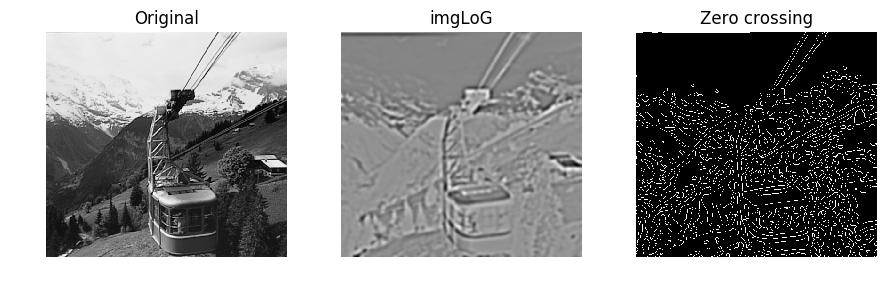

In [8]:
## LoG 边缘检测算子 (Marr-Hildreth 算法)
 # 判断零交叉点
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def ZeroDetect(img):
    h, w = img.shape[0], img.shape[1]
    zeroCrossing = np.zeros_like(img, np.uint8)
    for x in range(0, w-1):
        for y in range(0, h-1):
            if img[y][x] < 0:
                if (img[y][x-1] > 0) or (img[y][x+1] > 0) \
                or (img[y-1][x] > 0) or (img[y+1][x] > 0):
                    zeroCrossing[y][x] = 255
    return zeroCrossing

# img = cv2.imread("data/house.tif", flags=0)  
img=cv2.imread("data/cablecar.bmp",0)
imgBlur = cv2.blur(img, (3,3)) 


# 由 Gauss 标准差计算 Marr-Hildreth 卷积核
sigma = 4  
# 根据标准差确定窗口大小，大于等于6σ的最小奇数
size = int(2 * round(3 * sigma)) + 1 

# 计算 LoG 卷积核
x, y = np.meshgrid(np.arange(-size/2+1, size/2+1), np.arange(-size/2+1, size/2+1))  
norm2 = np.power(x, 2) + np.power(y, 2)
sigma2, sigma4 = np.power(sigma, 2), np.power(sigma, 4)
kernelLoG = ((norm2 - (2.0 * sigma2)) / sigma4) * np.exp(- norm2 / (2.0 * sigma2)) 

# Marr-Hildreth 卷积运算 
imgLoG = signal.convolve2d(imgBlur, kernelLoG, boundary='symm', mode='same')  # 卷积计算


# 判断零交叉点
zeroCrossing = ZeroDetect(imgLoG)

#display
plt.figure(figsize=(9, 7))
images=[img,imgLoG,zeroCrossing]
titles=['Original','imgLoG','Zero crossing']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

#### exercise1
> * Adjust the threshold approximately equal to 4% of the maximum  value of the LoG image. 
> * Then, the majority of the principal edges were readily detected, and “irrelevant” features, such as the edges due to the bricks and the tile roof, were filtered out. 

将阈值调整为LoG映像最大值的4%。

然后，大部分的主边缘很容易被检测到，“不相关”的特征，如由于砖和瓦屋顶的边缘，被过滤掉。


In [ ]:

## LoG 边缘检测算子 (Marr-Hildreth 算法)
 # 判断零交叉点
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def ZeroDetect(img):
    h, w = img.shape[0], img.shape[1]
    zeroCrossing = np.zeros_like(img, np.uint8)
    for x in range(0, w-1):
        for y in range(0, h-1):
            if img[y][x] < 0:
                if (img[y][x-1] > 0) or (img[y][x+1] > 0) \
                or (img[y-1][x] > 0) or (img[y+1][x] > 0):
                    zeroCrossing[y][x] = 255
    return zeroCrossing

img = cv2.imread("data/house.tif", flags=0)  
imgBlur = cv2.blur(img, (3,3)) 

# 由 Gauss 标准差计算 Marr-Hildreth 卷积核
sigma = 4  
# 根据标准差确定窗口大小，大于等于6σ的最小奇数
size = int(2 * round(3 * sigma)) + 1 

# 计算 LoG 卷积核
x, y = np.meshgrid(np.arange(-size/2+1, size/2+1), np.arange(-size/2+1, size/2+1))  
norm2 = np.power(x, 2) + np.power(y, 2)
sigma2, sigma4 = np.power(sigma, 2), np.power(sigma, 4)
kernelLoG = ((norm2 - (2.0 * sigma2)) / sigma4) * np.exp(- norm2 / (2.0 * sigma2)) 

# Marr-Hildreth 卷积运算 
imgLoG = signal.convolve2d(imgBlur, kernelLoG, boundary='symm', mode='same')  # 卷积计算

##### coding here
...
zerocrossing_threshold=???



# 判断零交叉点
zeroCrossing = ZeroDetect(imgLoG)

#display
plt.figure(figsize=(9, 7))
images=[img,imgLoG,zeroCrossing,zerocrossing_threshold]
titles=['Original','imgLoG','Zero crossing','Zero crossing_threshold(0.04)']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()







#### Canny边缘检测算子

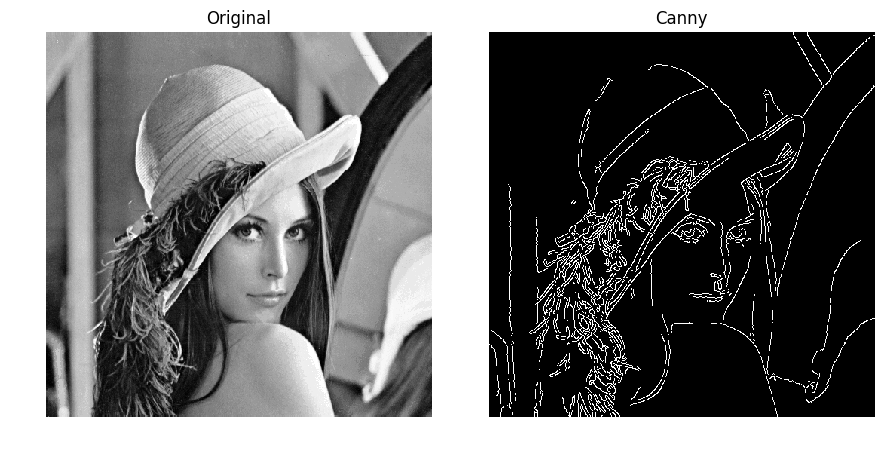

In [9]:
## Canny 边缘检测算子
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("data/lenna.bmp", 0)  

# 高斯核低通滤波器，sigmaY 缺省时 sigmaY=sigmaX
kSize = (5, 5)
imgGauss1 = cv2.GaussianBlur(img, kSize, sigmaX=1.0)  

# Canny 边缘检测，t1,t2为阈值大小
t1, t2 = 50, 150
imgCanny = cv2.Canny(imgGauss1, t1, t2)

plt.figure(figsize=(9, 6))
plt.subplot(121), plt.title("Original"), plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.title("Canny"), plt.imshow(imgCanny, cmap='gray'), plt.axis('off')
plt.tight_layout()
plt.show()


### edge linking边缘连接
> * Ideally, edge detection should yield sets of pixels lying only on edges. In practice, 
these pixels seldom characterize edges completely because of noise, breaks in the 
edges caused by nonuniform illumination, and other effects that introduce discontinuities in intensity values. Therefore, edge detection typically is followed by linking 
algorithms designed to assemble edge pixels into meaningful edges and/or region 
boundaries

理想情况下，边缘检测应该产生只位于边缘上的像素集。在实践中,这些像素很少完全描述边缘，因为噪声，在由不均匀照明和其他引起强度值不连续的效应造成的边缘。因此，边缘检测之后通常是链接用来将边缘像素组合成有意义的边缘和/或区域的算法边界

#### Local Processing局部
> * A simple approach for linking edge points is to analyze the characteristics of pixels 
in a small neighborhood about every point (,) x y that has been declared an edge 
point by one of the techniques discussed in the preceding sections. All points that 
are similar according to predefined criteria are linked, forming an edge of pixels that 
share common properties according to the specified criteria.

连接边缘点的一种简单方法是分析像素的特征在一个小的邻域中，每个点(，)x y都被声明为边通过前几节中讨论的一种技术。所有的观点
都是相似的按照预先设定的标准进行链接，形成像素的边缘即根据指定的标准共享公共属性。

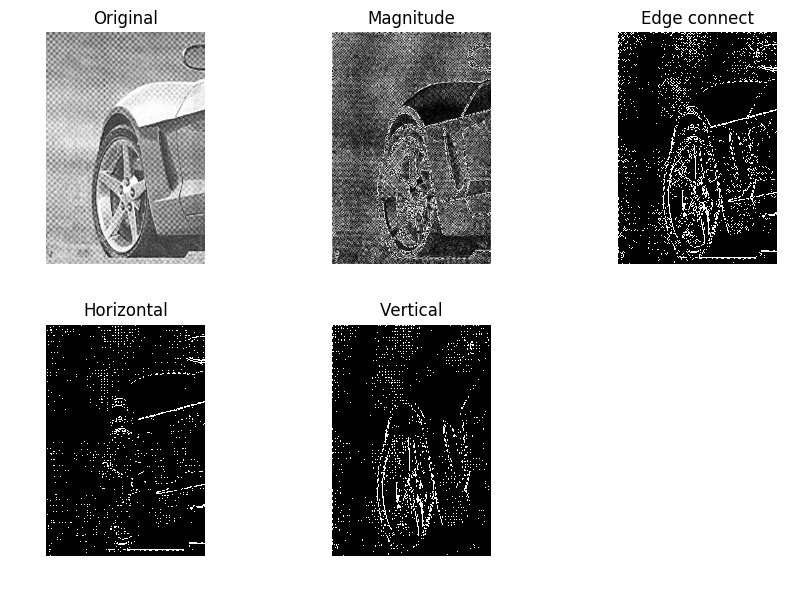

In [10]:
## 边缘连接的局部处理
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("data/car.png", flags=0)  
# img = cv2.imread("data/car.tif", flags=0)  
hImg, wImg = img.shape

# (1)Sobel 计算梯度
gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  
gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  
 # 计算梯度幅值 mag 和角度 angle
# magn, angle = cv2.cartToPolar(gx, gy, angleInDegrees=1)  
 # 梯度向量的幅值
magn = np.sqrt(np.power(gx,2) + np.power(gy,2)) 
 # 展平为一维，便于计算角度
gxFlat, gyFlat = gx.flatten(), gy.flatten() 
# 梯度向量的角度，将弧度转为角度: (-180, 180)
angleFlat = np.arctan2(gy, gx) * 180 / np.pi  
angle = angleFlat.reshape(hImg, wImg) 
angle = np.abs(angle)  # 角度转为: (0, 180)

# (2) 二值化处理
# TM 设为最大梯度的 20%
TM = 0.25 * magn.max()
 # A=90 水平扫描
A, Ta = 90, 30 
# 水平边缘
edgeX = np.zeros((hImg, wImg), np.uint8)  
for h in range(hImg):
    for w in range(wImg):
        if (magn[h, w] > TM) and (A-Ta < angle[h, w] < A+Ta):
            edgeX[h, w] = 255

# 垂直边缘           
edgeY = np.zeros((hImg, wImg), np.uint8) 
for h in range(hImg):
    for w in range(wImg):
        if (magn[h, w] > TM) and ((angle[h,w]<Ta) | (angle[h,w]>180-Ta)):
            edgeY[h, w] = 255

# (3) 水平垂直边缘合成
edgeConnect = cv2.bitwise_or(edgeX, edgeY)

#display
plt.figure(figsize=(9, 6))
images=[img,np.uint8(magn),edgeConnect,edgeX,edgeY]
titles=['Original','Magnitude','Edge connect','Horizontal','Vertical']
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


#### Global Processing Using the Hough Transform使用霍夫变换的全局处理
> * we develop an approach based on whether 
sets of pixels lie on curves of a specified shape. Once detected, these curves form the 
edges or region boundaries of interest.

我们开发了一种基于像素集是否位于特定形状的曲线上的方法。一旦检测到，这些曲线就形成了感兴趣的边缘或区域边界。

> * OpenCV 提供了函数 cv.HoughLines 实现标准霍夫变换查找二值图像中的线条。
> * 函数说明```cv.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]]) ```
>   * image：输入二值图像，8-bit 单通道图像
>   * lines：直线检测结果， 形状为 (n,1,2) 的Numpy 数组，每行两个元素 (rho, theta)
>   * rho：距离分辨率（以像素为单位）
>   * theta：角度分辨率（弧度）
>   * threshold：累加器（Accumulator）阈值，大于阈值的直线才会被检测输出
>   * srn： 可选项，多尺度霍夫变换变换中距离分辨率 rho 的除数
>   * stn： 可选项，多尺度霍夫变换变换中角度分辨率 theta 的除数
>   * min_theta：可选项，检查线条的最小角度，取值范围 (0,max_theta)
>   * max_theta：可选项，检查线条的最大角度，取值范围 (min_theta，pi)




In [13]:
## 霍夫变换直线检测
# img = cv2.imread("data/airfield.tif") 
img = cv2.imread("data/airfield.bmp") 
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hImg, wImg = imgGray.shape

# Canny 边缘检测
ratio, low = 3, 120
imgGauss = cv2.GaussianBlur(imgGray, (5, 5), 0)
imgCanny = cv2.Canny(imgGauss, low, low*ratio)


## 霍夫线变换
#  rho 距离分辨率（以像素为单位）, theta 角度分辨率（弧度）
#  返回：列表，形状为 (n,1,2) 的 Numpy 数组，每个元素 (n,1,:) 表示直线参数 rho, theta
lines = cv2.HoughLines(imgCanny, 1, np.pi/180, threshold=120)  
# print(lines.shape, type(lines))  

imgEdge = img.copy()
for i in range(8):
    rho, theta = lines[i,0,:] 
    # 直线与图像上下相交
    if (theta < (np.pi/4)) or (theta > (3*np.pi/4)):  
        # (x,0), 直线与顶侧的交点
        pt1 = (int(rho/np.cos(theta)), 0)  # (x,0), 直线与顶侧的交点
        # (x,h), 直线与底侧的交点
        pt2 = (int((rho - hImg * np.sin(theta))/np.cos(theta)), hImg)  
        cv2.line(imgEdge, pt1, pt2, (0, 0, 255)) 
    else: 
        # (0,y), 直线与左侧的交点
        pt1 = (0, int(rho/np.sin(theta)))  
        # (w,y), 直线与右侧的交点
        pt2 = (wImg, int((rho - wImg * np.cos(theta))/np.sin(theta))) 
        cv2.line(imgEdge, pt1, pt2, (255, 0, 255), 1)  

## 累积概率霍夫变换
# cv.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])
# rho 距离分辨率（以像素为单位）, theta 角度分辨率（弧度）
# threshold 累加器阈值参数, minLineLength 最小直线长度, maxLineGap 最大允许间隔
# 返回：列表，每个元素是一个 4 元组，表示直线端点坐标 (x1, y1, x2, y2)

# 直线的最短长度, 线段之间最大间隔
minLineLength,maxLineGap  = 100 ,20 
lines = cv2.HoughLinesP(imgCanny, 1, np.pi/180, 100, minLineLength, maxLineGap)  
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(imgEdge, (x1,y1), (x2,y2), (255, 215, 0), 2) 

# display
plt.figure(figsize=(9, 5))
images=[imgGray,imgCanny,cv2.cvtColor(imgEdge, cv2.COLOR_RGB2BGR)]
titles=['Origin','Canny','Hough']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

#### exercise2 

> * Refer to the public project in AIStudio to complete the circle detection based on hough transform

参考AIStudio中的公共项目，完成基于霍夫变换的圆检测

> * Try to detect all of the coins


![](https://ai-studio-static-online.cdn.bcebos.com/4716b798134649ab8a8c98d25e451865d4b3c54cd300450bb68a7d0a6a551c1e)




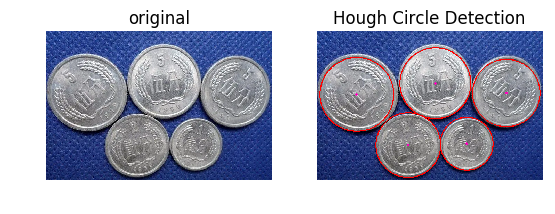

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in the image
image = cv2.imread('data/coin.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)
# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)
# plt.imshow(gray_blur, cmap='gray')
# for drawing circles on
circles_im = np.copy(image)
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=100,
                           param1=40,
                           param2=70,
                           minRadius=50,
                           maxRadius=110)
# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(255,0,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(255,0,190),3)
    
# plt.imshow(circles_im)

images = [image,circles_im]
title = ["original","Hough Circle Detection"]
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(title[i])
    plt.axis("off")


# print('Circles shape: ', circles.shape)

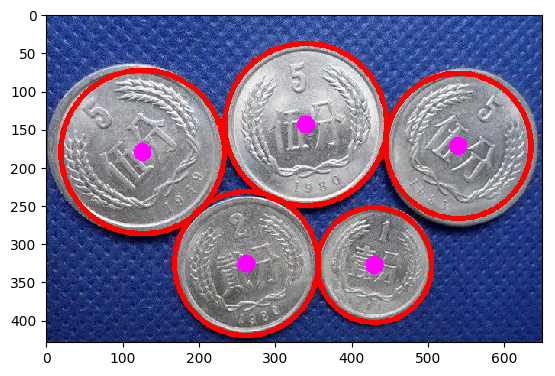

In [68]:
# 方法二
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('data/coin.jpg')
# img_copy=np.copy(img)
img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# 这里的kenelsize(5,5)是超参数可以调，但是只能是奇数
result = cv2.GaussianBlur(gray,(5,5),0)  

# TODO
circles1 = cv2.HoughCircles (result,cv2.HOUGH_GRADIENT,1,
                         minDist= 100 ,
                         param1= 300 ,
                         param2= 50 ,
                         minRadius= 60 ,
                         maxRadius= 300 )

circles = circles1[0,:,:]
circles = np.uint16(np.around(circles))
for i in circles[:]:
    cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),5)
    cv2.circle(img,(i[0],i[1]),2,(255,0,255),20)
    
plt.imshow(img)

## Thresholding





### basic global thresholding
> * 当图像中的目标和背景的灰度分布较为明显时，可以对整个图像使用固定阈值进行全局阈值处理。
> * 为了获得适当的全局阈值，可以基于灰度直方图进行迭代计算：
>   * （1）设置初始阈值 $T$，通常可以设为图像的平均灰度；
>   * （2）用灰度阈值 $T$ 分割图像：灰度值等于$ T $的所有像素集合$ G1 $和大于等于$ T$ 的所有像素集合$ G2$；
>   * （3）分别计算 $G1$、$G2$ 的平均灰度值$ m1$、$m2$；
>   * （4）求出新的灰度阈值 $T = ( m 1 + m 2 ) / 2$；
>   * （5）重复步骤（2）～（4），直到阈值变化小于设定值。


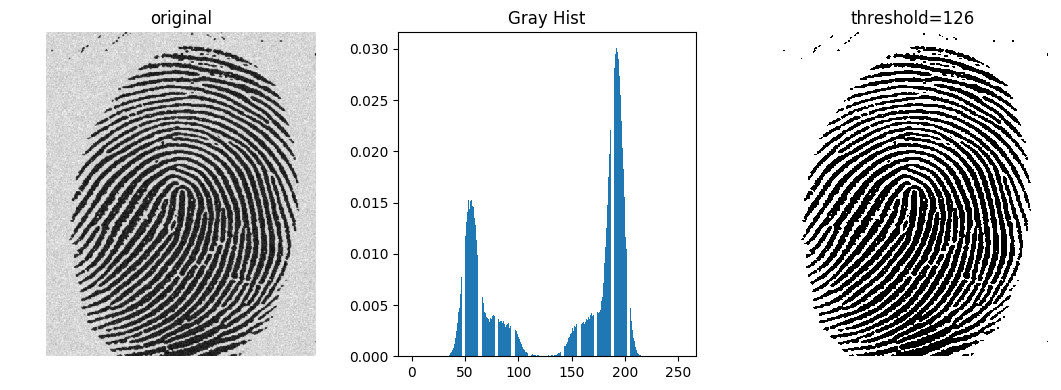

In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

## 全局阈值处理
img = cv2.imread("data/noisy_fingerprint.tif",0)

# 预定义值
deltaT = 1  
# 灰度直方图
histCV = cv2.calcHist([img], [0], None, [256], [0, 256]) 
# 灰度级 [0,255]
grayScale = range(256) 
# 像素总数
totalPixels = img.shape[0] * img.shape[1] 
# 内积, 总和灰度值 
totalGray = np.dot(histCV[:,0], grayScale)  
# 平均灰度
T = round(totalGray/totalPixels)  

while True:
    numC1, sumC1 = 0, 0
    # 计算 C1: (0,T) 平均灰度
    for i in range(T):
        # C1 像素数量
        numC1 += histCV[i,0] 
        # C1 灰度值总和
        sumC1 += histCV[i,0] * i
    # C2 像素数量, 灰度值总和
    numC2, sumC2 = (totalPixels-numC1), (totalGray-sumC1)  
    # C1 平均灰度
    T1 = round(sumC1/numC1)
    # C2 平均灰度
    T2 = round(sumC2/numC2) 
    # 计算新的阈值
    Tnew = round((T1+T2)/2)  
    # print("T={}, m1={}, m2={}, Tnew={}".format(T, T1, T2, Tnew))
    if abs(T-Tnew) < deltaT:  
        break
    else:
        T = Tnew

# 阈值处理
ret, imgBin = cv2.threshold(img, T, 255, cv2.THRESH_BINARY) 

# display
plt.figure(figsize=(11, 4))
plt.subplot(131), plt.axis('off'), plt.title("original"), plt.imshow(img, 'gray')
plt.subplot(132), plt.title("Gray Hist")
histNP, bins = np.histogram(img.flatten(), bins=255, range=[0, 255], density=True)
plt.bar(bins[:-1], histNP[:])
plt.subplot(133), plt.title("threshold={}".format(T)), plt.axis('off'),plt.imshow(imgBin, 'gray')
plt.tight_layout()
plt.show()


### OTSU method
> * 阈值处理本质上是对像素进行分类的统计决策问题。
> * OTSU 方法又称大津算法，使用最大化类间方差（intra-class variance）作为评价准则，基于对图像直方图的计算，可以给出类间最优分离的最优阈值。
> * 任取一个灰度值 $T$，可以将图像分割为两个集合 $F$ 和 $B$，集合 $F$、$B$ 的像素数的占比分别为$ pF$、$pB$，集合 $F$、$B$ 的灰度值均值分别为 $mF$、$mB$，图像灰度值为$m$，定义类间方差为：
>   * ![](https://ai-studio-static-online.cdn.bcebos.com/5c53ae59249d400db7832338c02cc85cebc22f92746f4c20ab94defa66b65fa6)
> * 使类间方差 ICV 最大化的灰度值 T 就是最优阈值。因此，只要遍历所有的灰度值，就可以得到使 ICV 最大的最优阈值 T。
> * OpenCV 提供了函数 ```cv.threshold``` 可以对图像进行阈值处理，将参数 type 设为 ```cv.THRESH_OTSU```，就可以使用使用 OTSU 算法进行最优阈值分割。


T=170, m1=160, m2=179, Tnew=170
170.0 181.0


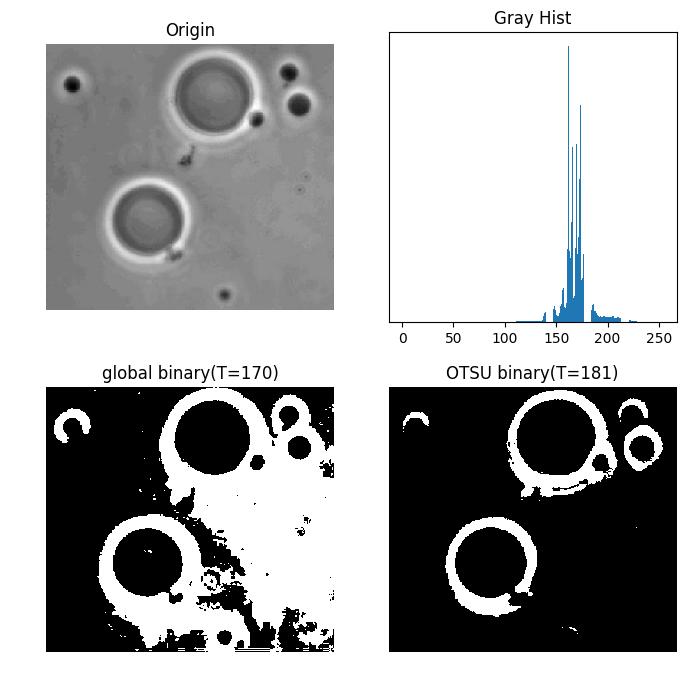

In [3]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

## OTSU 最优全局阈值处理
img = cv2.imread("data/polymersomes.tif", flags=0)

deltaT = 1  
histCV = cv2.calcHist([img], [0], None, [256], [0, 256]) 
grayScale = range(256)  
totalPixels = img.shape[0] * img.shape[1] 
totalGray = np.dot(histCV[:,0], grayScale) 
T = round(totalGray/totalPixels)
while True:
    numC1, sumC1 = 0, 0
    for i in range(T): 
        numC1 += histCV[i,0] 
        sumC1 += histCV[i,0] * i  
    numC2, sumC2 = (totalPixels-numC1), (totalGray-sumC1)  
    T1 = round(sumC1/numC1)  
    T2 = round(sumC2/numC2) 
    Tnew = round((T1+T2)/2)  
    print("T={}, m1={}, m2={}, Tnew={}".format(T, T1, T2, Tnew))
    if abs(T-Tnew) < deltaT:  
        break
    else:
        T = Tnew

# 阈值处理
ret1, imgBin = cv2.threshold(img, T, 255, cv2.THRESH_BINARY)  
ret2, imgOtsu = cv2.threshold(img, T, 255, cv2.THRESH_OTSU) 
print(ret1, ret2)

plt.figure(figsize=(7,7))
plt.subplot(221), plt.axis('off'), plt.title("Origin"), plt.imshow(img, 'gray')
plt.subplot(222, yticks=[]), plt.title("Gray Hist")  
histNP, bins = np.histogram(img.flatten(), bins=255, range=[0, 255], density=True)
plt.bar(bins[:-1], histNP[:])
plt.subplot(223), plt.title("global binary(T={})".format(T)), plt.axis('off')
plt.imshow(imgBin, 'gray')
plt.subplot(224), plt.title("OTSU binary(T={})".format(round(ret2))), plt.axis('off')
plt.imshow(imgOtsu, 'gray')
plt.tight_layout()
plt.show()


## segmentation by region（区域分割）
### region growing（区域生长）
> * 区域生长方法将具有相似性质的像素或子区域组合为更大区域。
> * 区域生长方法是以区域为处理对象，基于区域内部和区域之间的同异性，尽量保持区域中像素的临近性和一致性的统一 。
> * 区域生长的基本方法是，对于一组“种子”点，通过把与种子具有相同预定义性质（如灰度或颜色范围）的邻域像素合并到种子像素所在的区域中，再将新像素作为新的种子不断重复这一过程，直到没有满足条件的像素为止。
> * 区域增长方法的步骤：
>   * （1）对图像自上而下、从左向右扫描，找到第 1 个还没有访问过的像素，将该像素作为种子 $(x0, y0)$；
>   * （2）以 $(x0, y0)$ 为中心, 考虑其 4 邻域或 8 邻域像素 $(x, y)$，如果其邻域满足生长准则,则将 $(x, y)$ 与 $(x0, y0)$ 合并到同一区域，同时将 $(x, y)$ 压入堆栈；
>   * （3）从堆栈中取出一个像素，作为种子$ (x0, y0)$ 继续步骤（2）；
>   * （4）当堆栈为空时返回步骤（1）;
>   * （5）重复步骤（1）-（4），直到图像中的每个点都被访问过，算法结束。


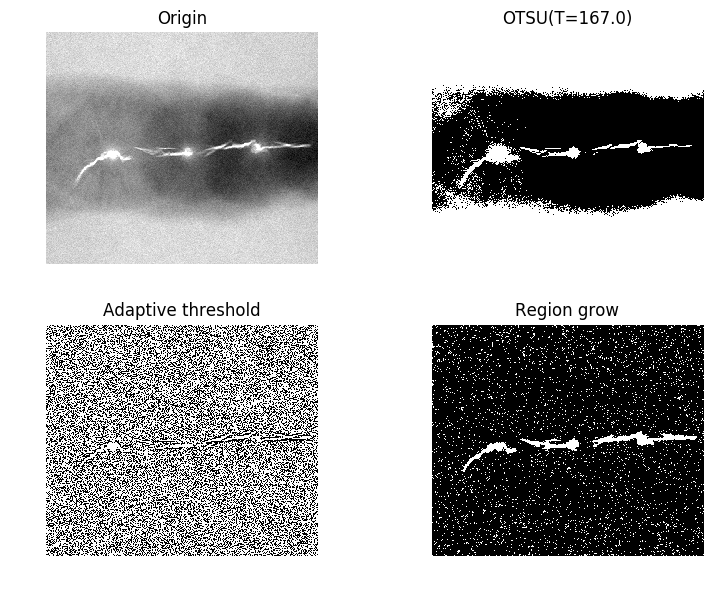

In [4]:
## 图像分割之区域生长

# 求两个像素的距离
def getGrayDiff(image, currentPoint, tmpPoint):  
    return abs(int(image[currentPoint[0], currentPoint[1]]) - int(image[tmpPoint[0], tmpPoint[1]]))

# 区域生长算法
def regional_growth(img, seeds, thresh=5):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        if (0<seed[0]<height and 0<seed[1]<weight): seedList.append(seed)
    # 种子位置标记    
    label = 1  # 种子位置标记
    # 8 邻接连通
    connects = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1), (-1,1), (-1,0)] 
    # 如果列表里还存在点
    while (len(seedList) > 0): 
        # 将最前面的那个抛出
        currentPoint = seedList.pop(0) 
        # 将对应位置的点标记为 1
        seedMark[currentPoint[0], currentPoint[1]] = label 
        # 对这个点周围的8个点一次进行相似性判断 
        for i in range(8): 
            tmpX = currentPoint[0] + connects[i][0]
            tmpY = currentPoint[1] + connects[i][1]
            # 是否超出限定阈值
            if tmpX<0 or tmpY<0 or tmpX>=height or tmpY>=weight: 
                continue
             # 计算灰度差
            grayDiff = getGrayDiff(img, currentPoint, (tmpX, tmpY)) 
            if grayDiff<thresh and seedMark[tmpX,tmpY]==0:
                seedMark[tmpX, tmpY] = label
                seedList.append((tmpX, tmpY))
    return seedMark


# 区域生长
img = cv2.imread("data/defective_weld.tif", flags=0)
# # 灰度直方图
# histCV = cv2.calcHist([img], [0], None, [256], [0, 256]) 
# OTSU 全局阈值处理
ret, imgOtsu = cv2.threshold(img, 127, 255, cv2.THRESH_OTSU) 
# 自适应局部阈值处理
binaryMean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 3)
# 区域生长图像分割
# seeds = [(10, 10), (82, 150), (20, 300)]  
imgBlur = cv2.blur(img, (3,3))  
_, imgTop = cv2.threshold(imgBlur, 250, 255, cv2.THRESH_BINARY)  
 # 过滤连通域，获得质心点 (x,y)
nseeds, labels, stats, centroids = cv2.connectedComponentsWithStats(imgTop)  
# 获得质心像素作为种子点
seeds = centroids.astype(int) 
imgGrowth = regional_growth(img, seeds, 8)

plt.figure(figsize=(8, 6))
plt.subplot(221), plt.axis('off'), plt.title("Origin")
plt.imshow(img, 'gray')
plt.subplot(222), plt.axis('off'), plt.title("OTSU(T={})".format(ret))
plt.imshow(imgOtsu, 'gray')
plt.subplot(223), plt.axis('off'), plt.title("Adaptive threshold")
plt.imshow(binaryMean, 'gray')
plt.subplot(224), plt.axis('off'), plt.title("Region grow")
plt.imshow(255-imgGrowth, 'gray')
plt.tight_layout()
plt.show()


### region spliting and merging（区域分裂和合并）
> * 区域分裂合并算法的基本思想是将图像细分为一组不相交的区域，然后聚合或者分离这些区域。
> * 分离和聚合的判据是用户选择的谓词逻辑$ Q$，通常是目标区域特征一致性的测度，例如灰度均值和方差。
> * 分离过程先判断当前区域是否满足目标的特征测度，如果不满足则将当前区域分离为多个子区域进行判断；不断重复判断、分离，直到拆分到最小区域为止。典型的区域分裂方法，是将区域按照 4 个象限分裂为 4 个子区域，可以简化处理和运算过程。
> * 区域分离的分割结果通常包含具有相同性质的邻接区域，通过聚合可以解决这个问题。仅当邻接区域的并集满足目标的特征测度，才将进行聚合。
> * 区域分离与聚合基本方案的过程如下：
>   * （1）区域分离：把所有满足条件 $ Q(R_i)=False$的区域 $Ri$等分为 4 个子区域，不断拆分直到最小单元；
>   * （2）区域聚合：把所有满足条件 $Q ( R j ∪ R k ) = T r u e$ 的相邻区域 $R j$ ,$ R k$ 聚合。


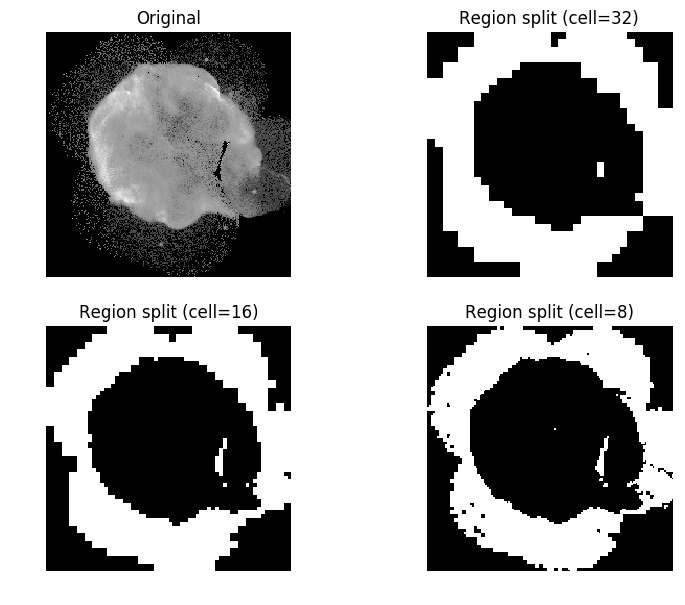

In [5]:
# 图像分割之区域分离
def SplitMerge(src, dst, h, w, h0, w0, maxMean, minVar, cell=4):
    win = src[h0: h0+h, w0: w0+w]
    mean = np.mean(win)  
    # 窗口区域的标准差,无偏样本标准差
    var = np.std(win, ddof=1) 
    # 该区域满足谓词逻辑条件，判为目标区域，设为白色
    if (mean<maxMean) and (var>minVar) and (h<2*cell) and (w<2*cell):
        dst[h0:h0+h, w0:w0+w] = 255 
    else:  
        # 区域能否继续分拆？继续拆
        if (h>cell) and (w>cell): 
            SplitMerge(src, dst, (h+1)//2, (w+1)//2, h0, w0, maxMean, minVar, cell)
            SplitMerge(src, dst, (h+1)//2, (w+1)//2, h0, w0+(w+1)//2,  maxMean, minVar, cell)
            SplitMerge(src, dst, (h+1)//2, (w+1)//2, h0+(h+1)//2, w0, maxMean, minVar, cell)
            SplitMerge(src, dst, (h+1)//2, (w+1)//2, h0+(h+1)//2, w0+(w+1)//2, maxMean, minVar, cell)
        

img = cv2.imread("data/cygnusloop_Xray_original.tif", flags=0)
hImg, wImg = img.shape
mean = np.mean(img)  
var = np.std(img, ddof=1) 
# 均值上界
maxMean = 80 
# 标准差下界 
minVar = 10  
src = img.copy()
dst1 = np.zeros_like(img)
dst2 = np.zeros_like(img)
dst3 = np.zeros_like(img)
SplitMerge(src, dst1, hImg, wImg, 0, 0, maxMean, minVar, cell=32)  
SplitMerge(src, dst2, hImg, wImg, 0, 0, maxMean, minVar, cell=16)  
SplitMerge(src, dst3, hImg, wImg, 0, 0, maxMean, minVar, cell=8)  

# display
plt.figure(figsize=(9, 7))
images=[img,dst1,dst2,dst3]
titles=["Original","Region split (cell=32)","Region split (cell=16)","Region split (cell=8)"]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout
plt.show()


### K-means
> * 聚类方法的思想是将样本集合按照其特征的相似性划分为若干类别，使同一类别样本的特征具有较高的相似性，不同类别样本的特征具有较大的差异性。
> * 基于聚类的区域分割，就是基于图像的灰度、颜色、纹理、形状等特征，用聚类算法把图像分成若干类别或区域，使每个点到聚类中心的均值最小。
>   * ![](https://ai-studio-static-online.cdn.bcebos.com/465f2c9222ab4abdbdad4b1c4b8381da6fa7cf6eec754889bf7a299d70ca0699)
> * k 均值（k-means）是一种无监督聚类算法。基于 k 均值聚类算法的区域分割，算法步骤为：
>   * （1）首先从图像中选取 k 个点作为初始的聚类中心；
>   * （2）对所有的像素点，计算像素到每个聚类中心的距离，将像素分类到距离最小的一个聚类中；
>   * （3）根据分类结果计算出新的聚类中心；
>   * （4）如此反复迭代直到聚类中心收敛到稳定值。

> * OpenCV 提供了函数 cv.kmeans 来实现 k-means 聚类算法。函数 cv.kmeans 不仅可以基于灰度、颜色对图像进行区域分割，也可以基于样本的其它特征如纹理、形状进行聚类。
> * 函数说明：``` compactness, labels, centersdst= cv.kmeans(data, K, bestLabels, criteria, attempts, flags[, centers])```
>   * data：用于聚类的数据，N 维数组，类型为 CV_32F、CV_32FC2
>   * K：设定的聚类数量
>   * bestLabels：整数数组，分类标签，每个样本的所属聚类的序号
>   * criteria：元组 (type, max_iter, epsilon)，算法结束标准，最大迭代次数或聚类中心位置精度
>       * cv2.TERM_CRITERIA_EPS：如果达到指定的精度 epsilon，则停止算法迭代
>       * cv2.TERM_CRITERIA_MAX_ITER：在指定的迭代次数max_iter之后停止算法
>       * cv2.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER：当满足上述任何条件时停止迭代
>   * attempts：标志，指定使用不同聚类中心初值执行算法的次数
>   * flags：像素邻域的尺寸，用于计算邻域的阈值，通常取 3，5，7
>       * cv2. KMEANS_RANDOM_CENTERS：随机产生聚类中心的初值
>       * cv2. KMEANS_PP_CENTERS：Kmeans++ 中心初始化方法
>       * cv2. KMEANS_USE_INITIAL_LABELS：第一次计算时使用用户指定的聚类初值，之后的计算则使用随机的或半随机的聚类中心初值
>   * centers：聚类中心数组，每个聚类中心为一行，可选项
>   * labels：整数数组，分类标签，每个样本的所属聚类的序号
>   * centersdst：聚类中心数组


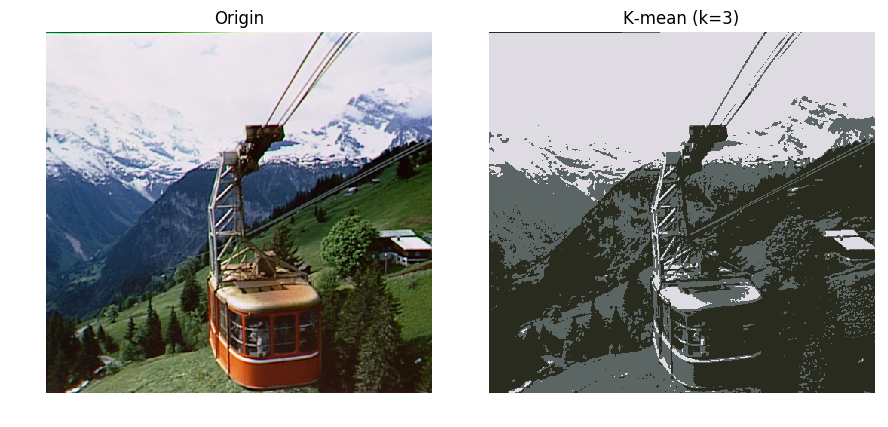

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# k 均值聚类
# img = cv2.imread("data/book-cover.tif") 
img = cv2.imread("data/cablecar.bmp") 


#此处-1表示行数自动计算
dataPixel = np.float32(img.reshape((-1, 3)))
# 终止条件
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 0.1)  
# 起始的中心选择
flags = cv2.KMEANS_RANDOM_CENTERS  

# 设置聚类数
K = 3  
_, labels, center = cv2.kmeans(dataPixel, K, None, criteria, 10, flags)
centerUint = np.uint8(center)
# 将像素标记为聚类中心颜色
classify = centerUint[labels.flatten()]  
# 恢复为二维图像
imgKmean3 = classify.reshape((img.shape)) 


# display
plt.figure(figsize=(9, 7))
plt.subplot(121), plt.axis('off'), plt.title("Origin")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
plt.subplot(122), plt.axis('off'), plt.title("K-mean (k=3)")
plt.imshow(cv2.cvtColor(imgKmean3, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()